<a href="https://colab.research.google.com/github/HadilGhaith/Prediction-of-product-sales./blob/main/prediction%20%20of%20product%20sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## "Loading Data"
-

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [7]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

## "Data Cleaning"

# columns :
- number of columns: 12
- (7) of them are object
- (5) of them are numaric, one is float and (4) are integer

- number of rows : 8523

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
string_cols = df.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [10]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
# 3. duplication
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

In [12]:
# 4. missing values
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# 5. filling missing values
df['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [14]:
mean_itme = df['Item_Weight'].mean()
#df['Item_Weight'] = df['Item_Weight'].fillna(mean_itme)  # should disscuss it with instructor ,how we chose the right placeholder
df['Item_Weight'].isna().sum()

1463

In [15]:
df['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [16]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [17]:
#df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].isna().sum()

2410

In [18]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [19]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
# 7. inconsistent categories
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [21]:
for col in string_cols:
  print(f"value counts for {col}")
  print(df[col].value_counts())
  print('\n')

value counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


value counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


value counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


value counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013

In [22]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [23]:
# 8. summary statistics
for col in num_cols:
  print(f'Summary Statistics of {col}')
  print(df[col].describe())
  print('\n')

Summary Statistics of Item_Weight
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


Summary Statistics of Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Summary Statistics of Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Summary Statistics of Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


Summary Statistics

# Exploratory Visuals

In [24]:
# import needed tools and libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# define numerical columns
num_col = df.select_dtypes('number').columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

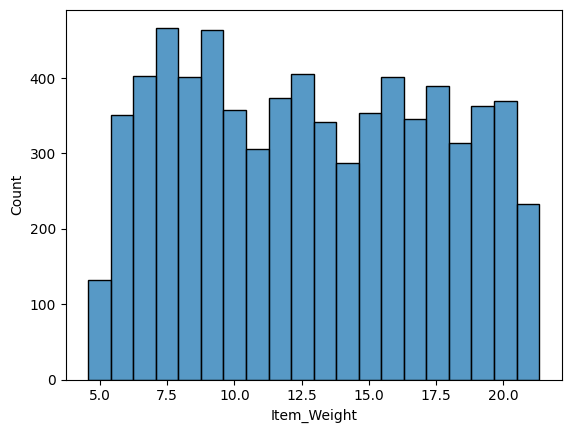

In [26]:
# histograms of numarical featuars
ax = sns.histplot(data=df, x='Item_Weight');

_ as the graph shows the maximum count for items with weights around 12.5 but since i filled the missing values in item weight with mean"which was a value around 12" so the count is not accurat

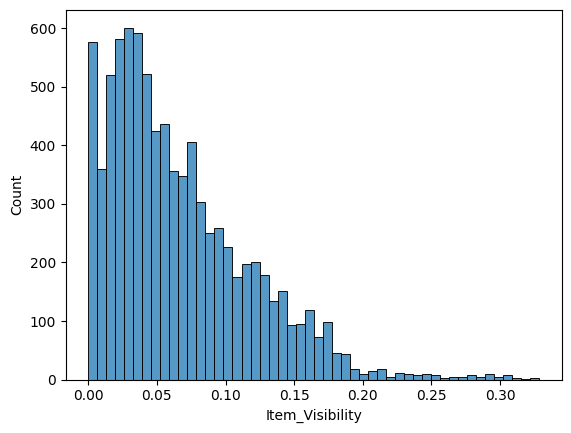

In [27]:
ax = sns.histplot(data = df, x='Item_Visibility');

- as we notice from the graph showen up, about half "from the total data" items sold had visibility range 0.0 - 0.05


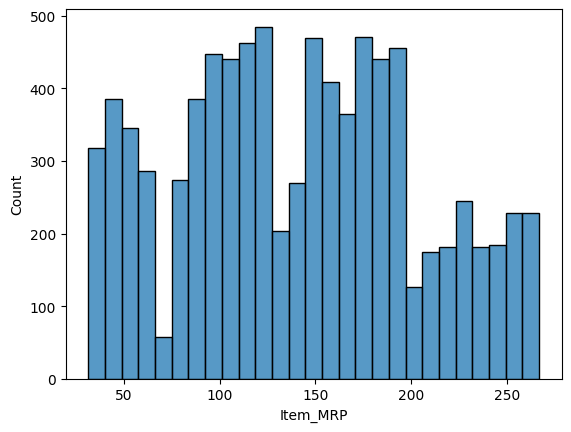

In [28]:
ax = sns.histplot(data=df, x='Item_MRP');

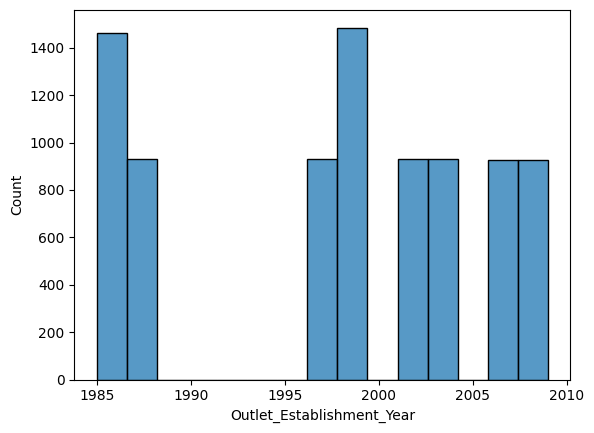

In [29]:
ax = sns.histplot(data=df, x='Outlet_Establishment_Year');

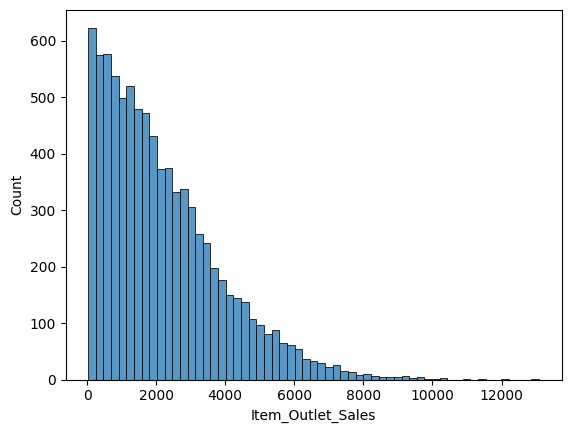

In [30]:
ax = sns.histplot(data=df, x ='Item_Outlet_Sales');

- the frequancy of sold items decrease with increasing the item outlet sales

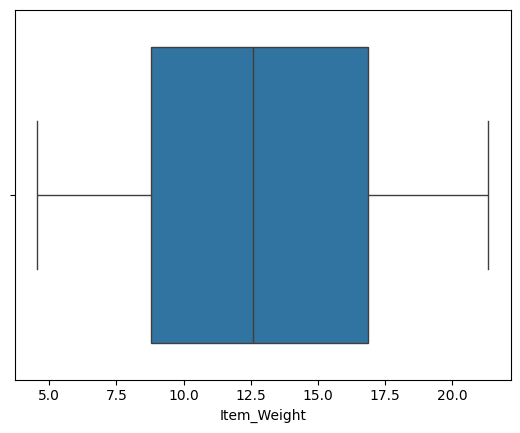

In [31]:
# boxplots of numaerical  features
ax = sns.boxplot(data=df, x='Item_Weight');

- the avarage weight of the items is
 12.5  , there is not outliers for weight

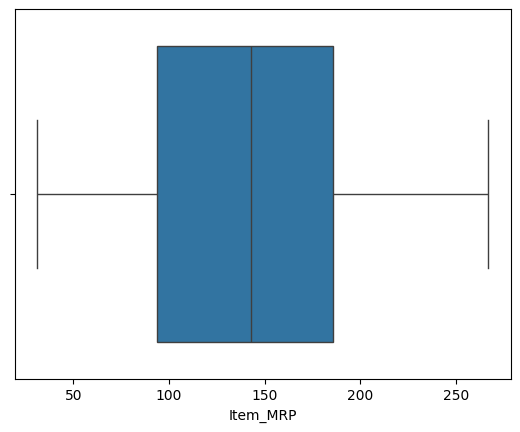

In [32]:
ax = sns.boxplot(data=df, x='Item_MRP');

- as showen in the figer the meadian of the item MRP is around 140

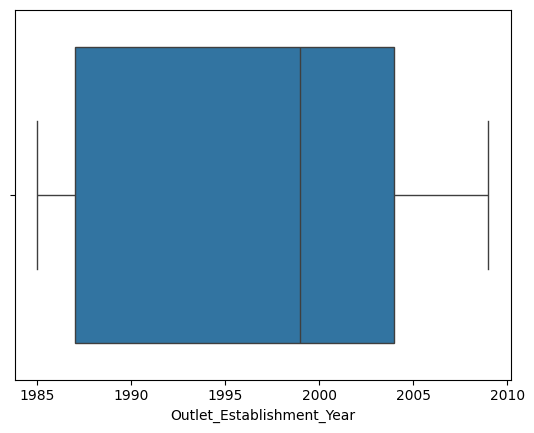

In [33]:
ax = sns.boxplot(data=df, x='Outlet_Establishment_Year');


- from the graph we conclouded most of items sold at outlet established befor 1999

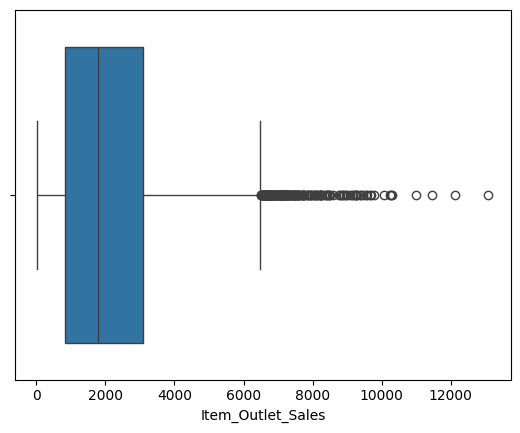

In [34]:
ax = sns.boxplot(data=df, x='Item_Outlet_Sales');


- for item outlet sales we saw there is alot of outliers which could effect on  mean, and the meadian is less than 2000

In [35]:
# categorical columns
cat_col = df.select_dtypes('object').columns
cat_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

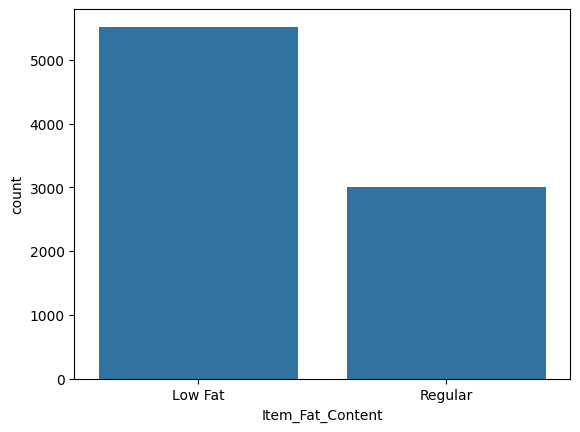

In [36]:
# count plots for categroical columns
ax = sns.countplot(data= df, x='Item_Fat_Content');


- it seem the preferabel item to buy with low fat content ,two third of sold items whil low fat content


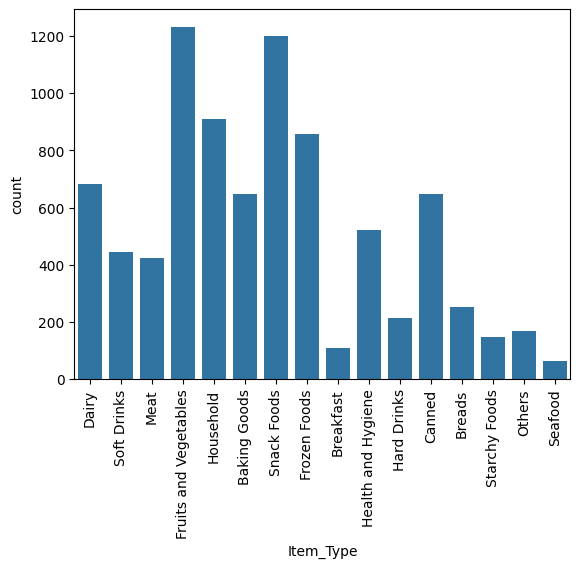

In [37]:
ax = sns.countplot(data= df, x='Item_Type')
ax.tick_params(axis='x', rotation= 90);

- most sold items from group {fruits and vegetabels, snack foods, and frozen food} so i think ppl tend to consume food doesnt need too much time to produce so foucs on such type would had a good oppourtienties of sales

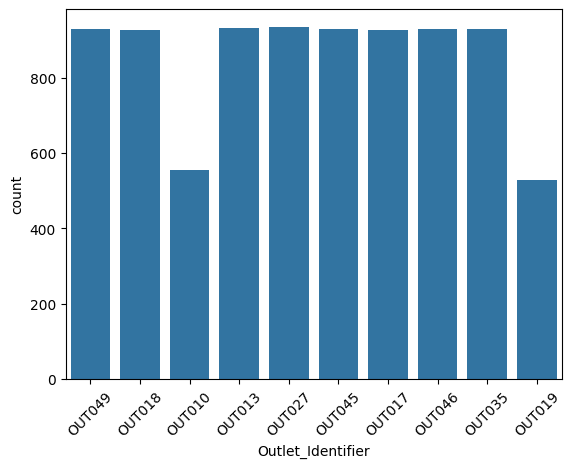

In [38]:
ax = sns.countplot(data= df, x='Outlet_Identifier')
ax.tick_params(axis='x', rotation= 45);

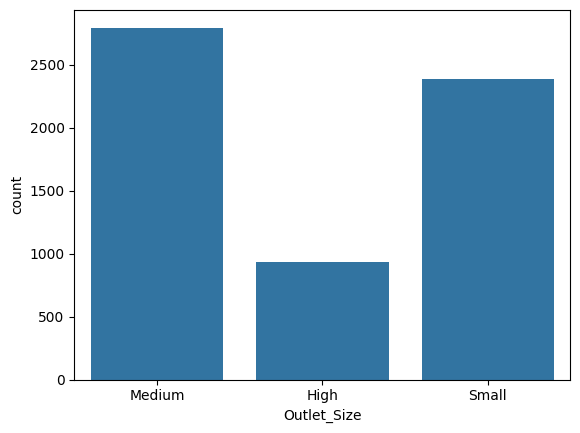

In [39]:
ax = sns.countplot(data= df, x='Outlet_Size');

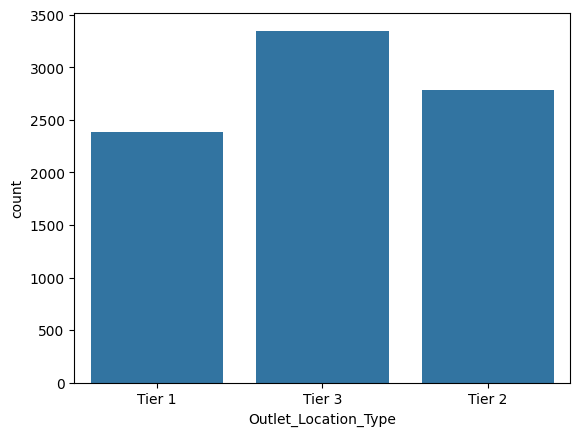

In [40]:
ax = sns.countplot(data= df, x='Outlet_Location_Type');

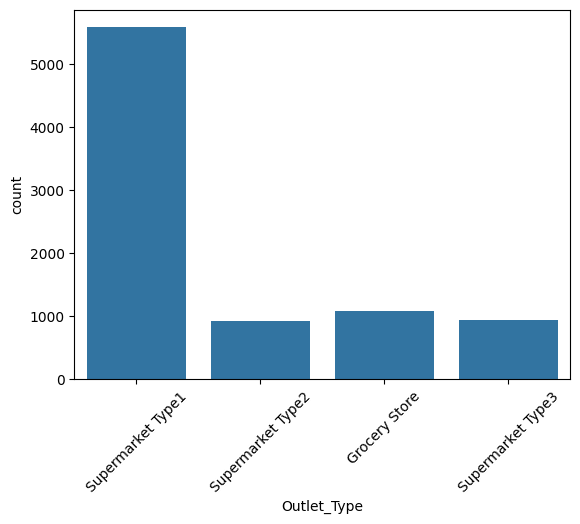

In [41]:
ax = sns.countplot(data= df, x='Outlet_Type')
ax.tick_params(axis='x', rotation=45);

In [42]:
# corrolation between the numarical features and heat map
corr = df.corr(numeric_only= True)
corr.round(2)

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                       1.00            -0.01      0.03   
Item_Visibility                  -0.01             1.00     -0.00   
Item_MRP                          0.03            -0.00      1.00   
Outlet_Establishment_Year        -0.01            -0.07      0.01   
Item_Outlet_Sales                 0.01            -0.13      0.57   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                    -0.01               0.01  
Item_Visibility                                -0.07              -0.13  
Item_MRP                                        0.01               0.57  
Outlet_Establishment_Year                       1.00              -0.05  
Item_Outlet_Sales                              -0.05               1.00

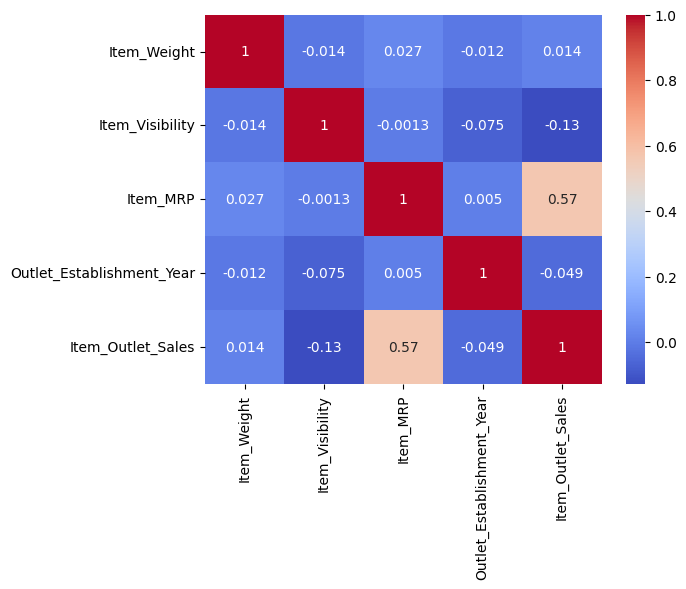

In [43]:
sns.heatmap(corr, cmap= 'coolwarm', annot= True);

- from the heat map we notice there is a positive modarate corr between item MRP , and item outlet sales, for rthe rest of relastions between numaric features the corr is weak

# Feature Inspection

In [44]:
 """UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

### Data Dictionary
- Variable Name	and Description
- Item_Identifier:  	Product ID
- Item_Weight:   	Weight of product
- Item_Fat_Content:	Whether the product is - low-fat or regular
- Item_Visibility: 	The percentage of total
 display area of all products in a - - - store allocated to the particular product
- Item_Type:	The category to which the product belongs
- Item_MRP:	Maximum Retail Price (list price) of the product
- Outlet_Identifier:  	Store ID
- Outlet_Establishment_Year:	The year in which store was established
- Outlet_Size:	The size of the store in terms of ground area covered
- Outlet_Location_Type:	The type of area in which the store is located
- Outlet_Type:	Whether the outlet is a grocery store or some sort of supermarket
- Item_Outlet_Sales:	Sales of the product in the particular store. This is the - - target variable to be predicted.

### Example: {Item_Identifier}**

- Item_Identifier: Product ID.
  - Category defintions (if categorical)
  

In [45]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df[feature].dtype

dtype('O')

<ipython-input-44-ba8260e6274b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


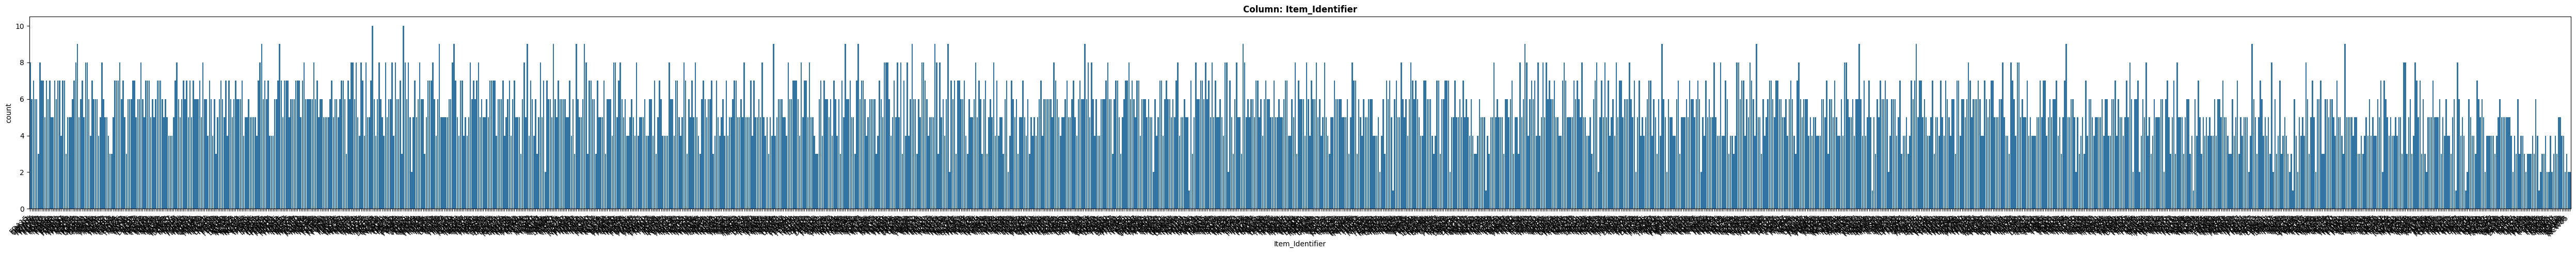

In [46]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature, figsize=(50,5));

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categroical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - uniq= 1559, its high cardinality

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes



- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


<ipython-input-44-ba8260e6274b>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


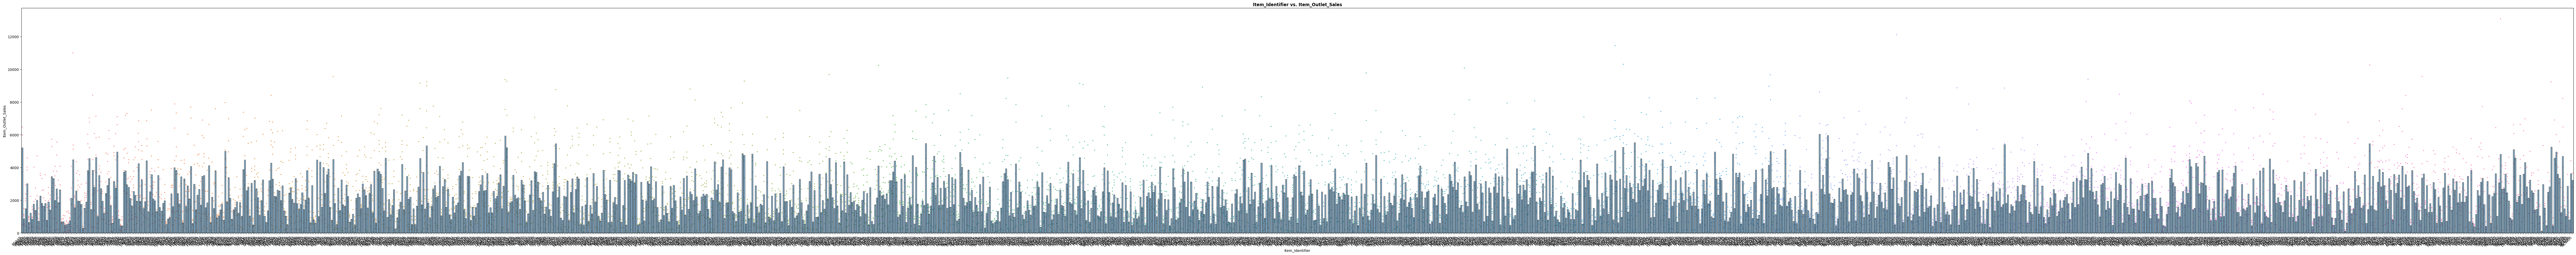

In [47]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, figsize=(100,10));

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - no ?
  - Does this feature appear to be a predictor of the target?
    - no  ?

___

### Example: {Item_Weight}

- Item_Weight: Weight of product dictionary.
  - Category defintions (if categorical)
  

In [48]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

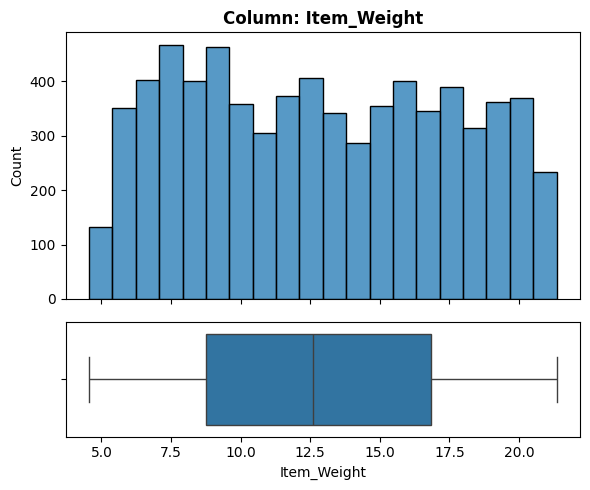

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [49]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - yes (1463), with percentage of (17.17%)

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - its not a categrooical

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes, cus its distrubeation close to be simatric



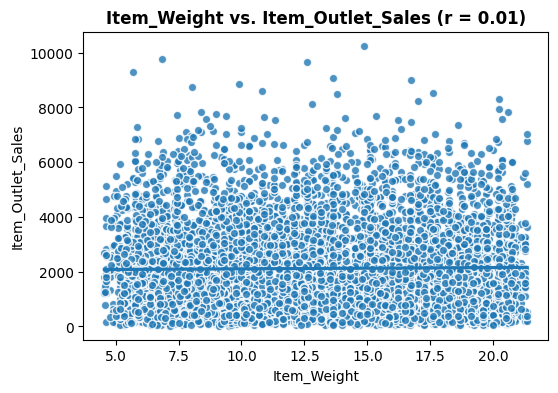

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [50]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - no
  - Does this feature appear to be a predictor of the target?
    - no stromg corr between item weight and the target

___

### Example: {Item_Fat_Content}

- Item_Fat_Content: Whether the product is low-fat or regular.
  - Category defintions (if categorical)
  

In [51]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

<ipython-input-44-ba8260e6274b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


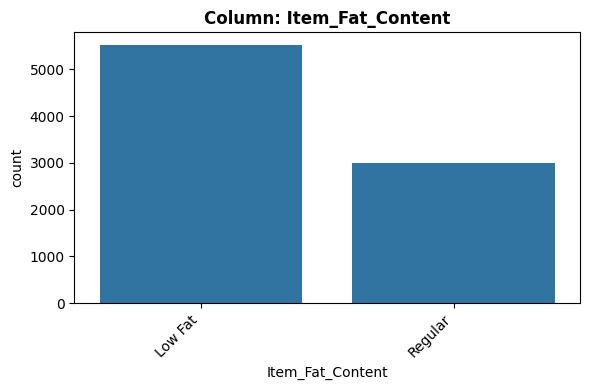

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [52]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - there is no null

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - no , only 2 uniq values

5. Would we know this BEFORE the target is determined?
  -  yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no, its effect the sales



<ipython-input-44-ba8260e6274b>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


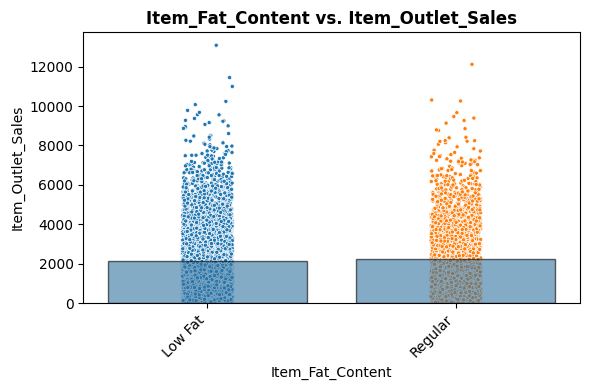

In [53]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - not too much , its seems like close to eah other in sales

___

### Example: {Item_Visibility}

- Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product.
  - Category defintions (if categorical)
  

In [54]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

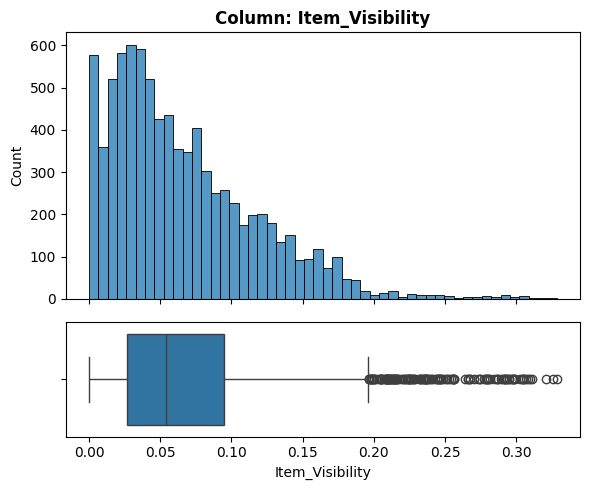

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [55]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - numerica there is no cardinality

5. Would we know this BEFORE the target is determined?
  - no

6. Is there a business case/understanding reason to exclude based on our business case?
  - no ,



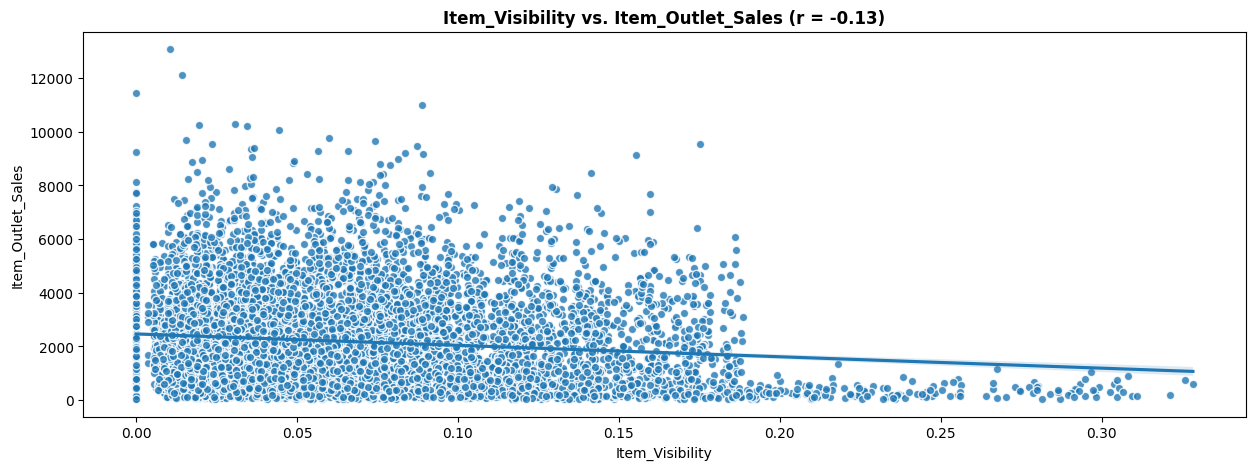

(<Figure size 1500x500 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [56]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, figsize=(15,5))

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes but slightly
  - Does this feature appear to be a predictor of the target?
    - there is a slightly negative corr, but the product with visibility between 0.2-0.3 have less sales and intisity than othere

___

### Example: {Item_Type}

- Item_Type: The category to which the product belongs.
  - Category defintions (if categorical)
  

In [57]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

<ipython-input-44-ba8260e6274b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


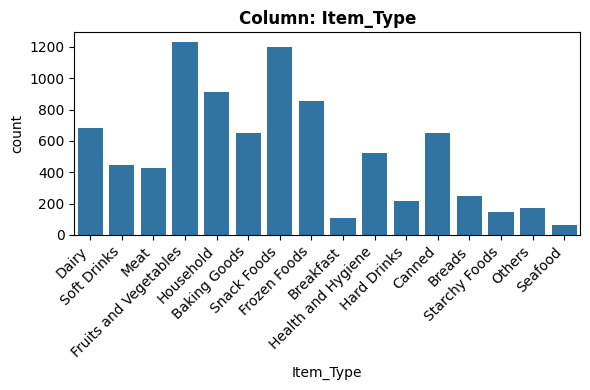

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [58]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no

3. Is the feature constant or quasi-constant?
  - .its not

4. What is the cardinality? Is it high?
  - yes uniq value more than ten

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-44-ba8260e6274b>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


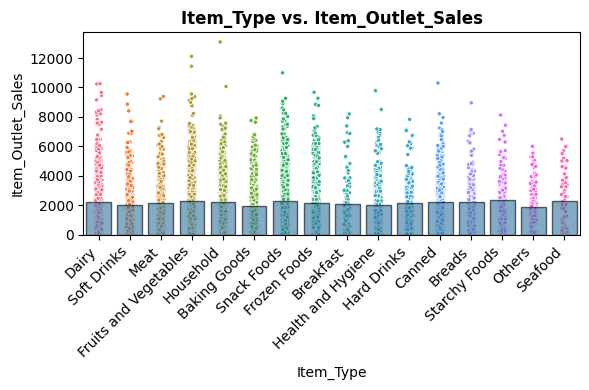

In [59]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - still not too much all of types had a avarage arounf 2000, but some of them recoreded a very high sales like household and fruits and vegetabels.
  - Does this feature appear to be a predictor of the target?
    - slightly we need to check more

___

### Example: {tem_MRP}

- tem_MRP: Maximum Retail Price (list price) of the product.
  - Category defintions (if categorical)
  

In [60]:
# # Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

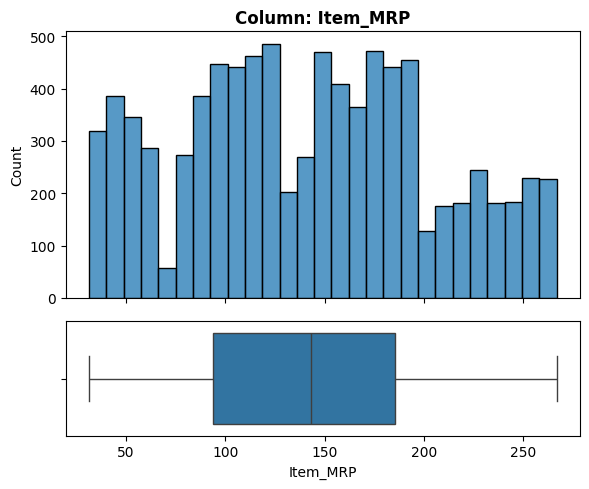

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [61]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - there is no nulls

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - numeric

5. Would we know this BEFORE the target is determined?
  - no

6. Is there a business case/understanding reason to exclude based on our business case?
  - there is no



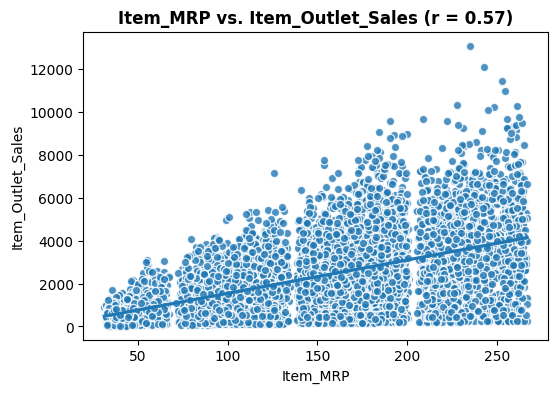

In [62]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes it is
  - Does this feature appear to be a predictor of the target?
    - there is a corr betweem the item MRP and sales but if we think like any thing with highe retail price should be sold  in higher price so the sales money in case the number in target colum refer the sales in currency

___

### Example: {Outlet_Identifier}

- Outlet_Identifier:Store ID.
  - Category defintions (if categorical)
  

In [63]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

<ipython-input-44-ba8260e6274b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


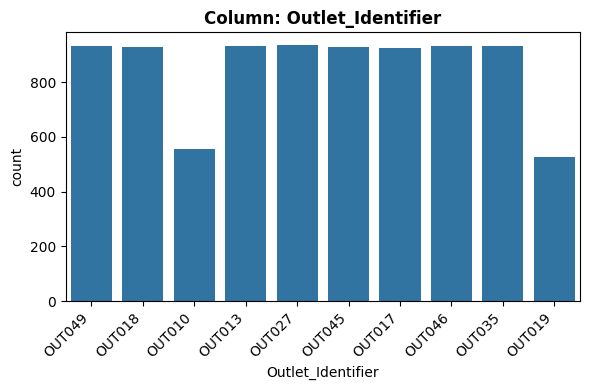

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [64]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no nulls

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - it is exactly 10 so it is colser to high cardinality

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no cus the prediction is the sales of the outlit



<ipython-input-44-ba8260e6274b>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


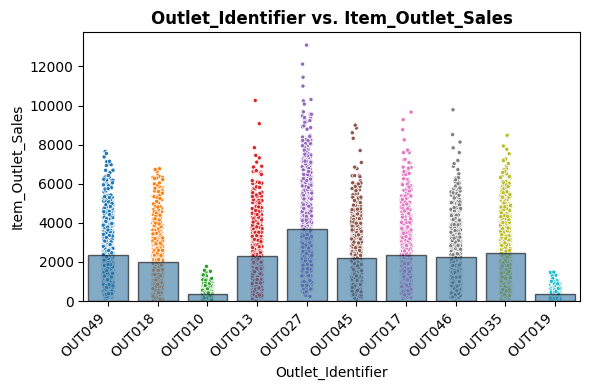

In [65]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes the out027 had the higher sales also there is varity in sales and the out 010 ,and out019 seems to be smaller stores so their sales are less
  - Does this feature appear to be a predictor of the target?
    - yes it is

___

### Example: {Outlet_Establishment_Year}

- Outlet_Establishment_Year : The year in which store was established.
  - Category defintions (if categorical)
  

In [66]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

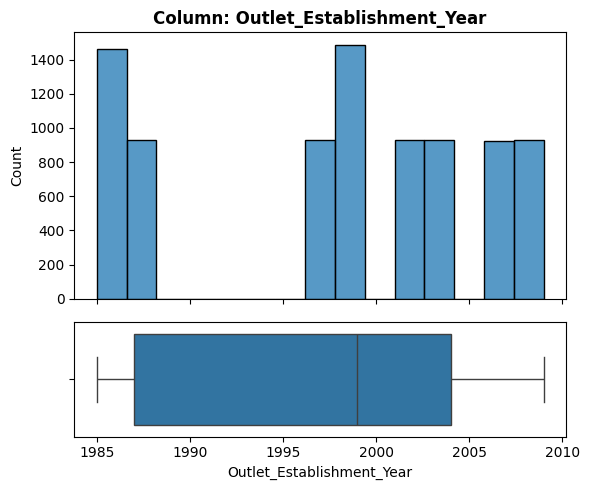

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [67]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no nulls

3. Is the feature constant or quasi-constant?
  - not

4. What is the cardinality? Is it high?
  - numeric ,no cardinality for numeric features

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



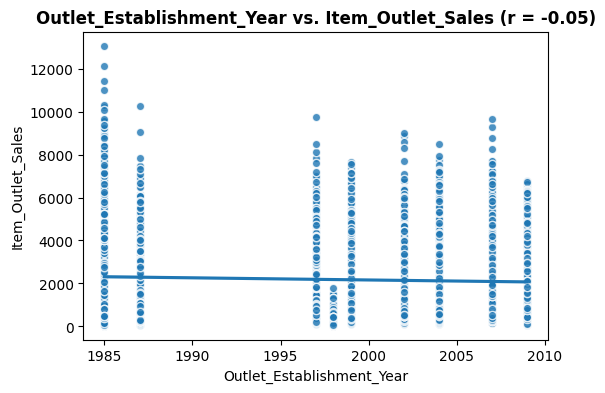

In [68]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - no relations with target
  - Does this feature appear to be a predictor of the target?
    - no relation

___

### Example: {Outlet_Size}

- Outlet_Sized: The size of the store in terms of ground area covered.
  - Category defintions (if categorical)
  

In [69]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

<ipython-input-44-ba8260e6274b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


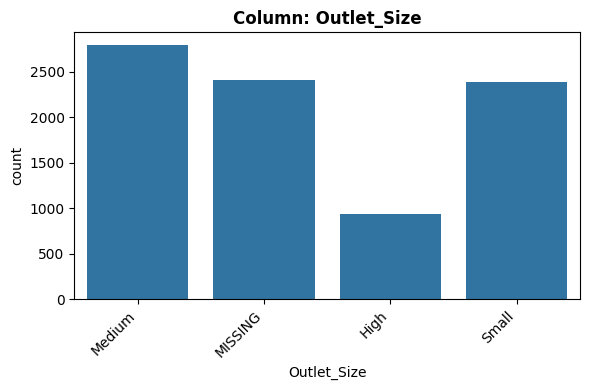

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [70]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 with (28.28%) but can be look cus the size of the outlit doesnot change so in case we foound one entery for with the size can we fill it for every same outlit

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - there is 4 unique value which is low cardinality

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-44-ba8260e6274b>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

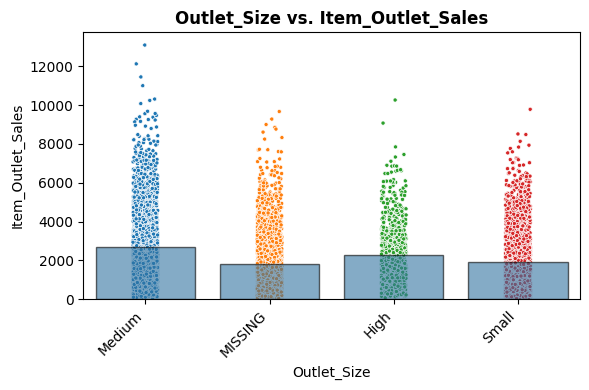

In [71]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, "Outlet_Size")

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - meddium size of outlit have higher avarge and higher values of sales so it could affect on the sales.
  - Does this feature appear to be a predictor of the target?
    - yes but knowing the the missing values will only be one of the three other value so knowing them will lead for a clear image.

___

### Example: {Outlet_Location_Type}

- Outlet_Location_Type:The type of area in which the store is located.
  - Category defintions (if categorical)
  

In [72]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

<ipython-input-44-ba8260e6274b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


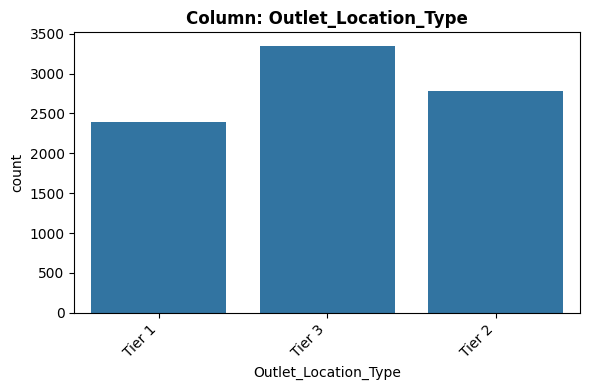

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [73]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - zero

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - no there is only three unique values

5. Would we know this BEFORE the target is determined?
  - ...yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-44-ba8260e6274b>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

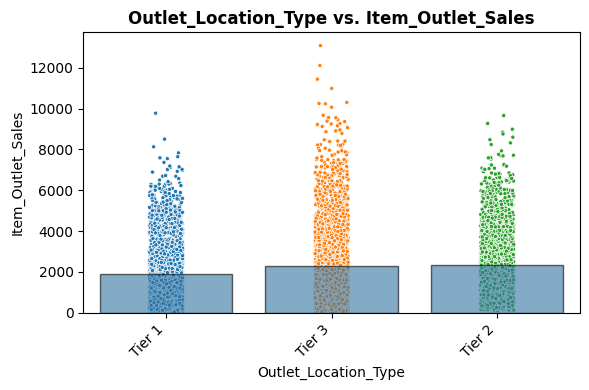

In [74]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `the avarge is close to eachother, but the outlit that locate in tire 3have higher sales
  - Does this feature appear to be a predictor of the target?
    - maybe if i comper it with other feacher like outlit size

___

### Example: {Outlet_Type}

- Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket.
  - Category defintions (if categorical)
  

In [75]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

<ipython-input-44-ba8260e6274b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


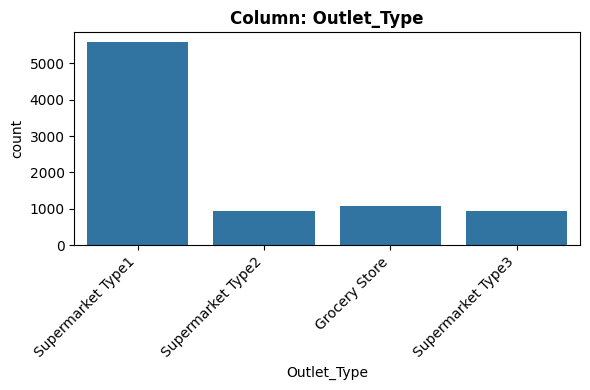

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [76]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - zero

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - not high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-44-ba8260e6274b>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

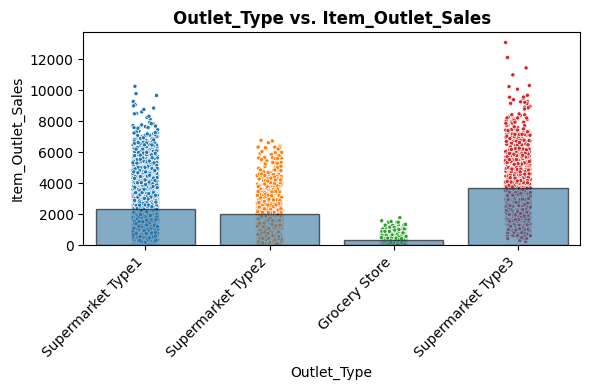

In [77]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - as we see the supermarket type three has the highe avarge and also higer sales , even that supermarket type one have mush more item seal in it for grocery store its normal cus i think its much smaleer than other so less item less sales
  - Does this feature appear to be a predictor of the target?
    - yes it is

___

In [78]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week04/project 1-part 4.ipynb'
df.to_csv(fpath)

# Project_1_Part_5_(Core).ipynb

In [79]:
# import needed tools
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

## Cleaning Data

In [80]:
# check for duplicated
df.duplicated().sum()

0

In [81]:
# fix inconsistencies in categorical
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [82]:
for col in cat_cols:
  print(f'Value counts for {col}\n', df[col].value_counts(), '\n')

Value counts for Item_Identifier
 Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64 

Value counts for Item_Fat_Content
 Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64 

Value counts for Item_Type
 Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64 

Value counts for Outlet_Identifier
 Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035  

In [83]:
# fix the inconsistencies in item_fst_content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [84]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Preprocessing for Machine Learning

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [153]:
# define target and feature matrix
y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])

In [154]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [155]:
# preprocessing for numeric columns
# define numeric columns
num_cols = X_train.select_dtypes('number').columns
print('Numeric Columns:', num_cols)
# imput mean for item weight
mean_imputer = SimpleImputer(strategy='mean')
# scaleing the numeric columns
num_scaler = StandardScaler()
# numeric pipeline
num_pipe = make_pipeline(mean_imputer, num_scaler)
# num tuple
num_tuple = ("numeric", num_pipe, num_cols)
num_tuple
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [156]:
# value count
X_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2103
Small     1788
High       689
Name: count, dtype: int64

In [157]:
X_train['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2531
Tier 2    2106
Tier 1    1755
Name: count, dtype: int64

In [158]:
# preprocessing for ordinal featurs
# define ordinal featurs
ord_cols = ['Outlet_Size', 'Outlet_Location_Type']
print('Ordinal Columns:', ord_cols)
# impute the ordinal data
ord_imputer = SimpleImputer(strategy='constant', fill_value= 'Medium')
# ordering for ordinal columns
size_order = ['Small', 'Medium', 'High']
type_order = ['Tier 1', 'Tier 2', 'Tier 3']
ord_order = [size_order, type_order]
ord_encoder = OrdinalEncoder(categories=ord_order)
# scaleing ordinal feature
ord_scaler = StandardScaler()
# pipeline
ord_pipe = make_pipeline(ord_imputer, ord_encoder, ord_scaler)
# ordinal tuple
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_pipe

Ordinal Columns: ['Outlet_Size', 'Outlet_Location_Type']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Medium', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [159]:
# preprocessing for nominal features
# define nominal columns
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print('Nominal Columns:', ohe_cols)
# one hot encoding for nominal
ohe_encoder = OneHotEncoder(sparse_output=False, drop = 'first')
# nominal pipeline
ohe_pipe = make_pipeline(ohe_encoder)
# nominal tuple
ohe_tuple = ('Nominal', ohe_pipe, ohe_cols)
ohe_pipe

Nominal Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], dtype='object')


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(drop='first', sparse_output=False))])

# Instantiate the Column Transformer

In [160]:
# instantiate
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Medium',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  Ordin...(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('Nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

# Fit Column Transformer on Training Data

In [161]:
# fit
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Medium',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  Ordin...(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('Nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

# Transform Train and Testing Data

In [162]:
# transform train data
X_train_tf = preprocessor.transform(X_train)
# transform test data
X_test_tf = preprocessor.transform(X_test)
# check X_train
X_train_tf.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
4776     0.817249        -0.712775  1.828109                   1.327849   
7510     0.556340        -1.291052  0.603369                   1.327849   
5828    -0.131512         1.813319  0.244541                   0.136187   
5327    -1.169219        -1.004931 -0.952591                   0.732018   
4810     1.528819        -0.965484 -0.336460                   0.493686   

      Outlet_Size  Outlet_Location_Type  Item_Fat_Content_Regular  \
4776     0.287374              1.084948                       0.0   
7510     0.287374              1.084948                       1.0   
5828     0.287374             -1.384777                       1.0   
5327    -1.384048             -0.149914                       0.0   
4810     0.287374             -0.149914                       0.0   

      Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  ...  \
4776               0.0                  0.0               0.0  ...   
7510               0.0                  0.0               0.0  ...   
5828               0.0                  0.0               0.0  ...   
5327               0.0                  0.0               0.0  ...   
4810               0.0                  0.0               0.0  ...   

      Item_Type_Household  Item_Type_Meat  Item_Type_Others  \
4776                  1.0             0.0               0.0   
7510                  0.0             0.0               0.0   
5828                  0.0             1.0               0.0   
5327                  0.0             0.0               0.0   
4810                  0.0             0.0               0.0   

      Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
4776                0.0                    0.0                    0.0   
7510                0.0                    1.0                    0.0   
5828                0.0                    0.0                    0.0   
5327                0.0                    0.0                    0.0   
4810                0.0                    0.0                    0.0   

      Item_Type_Starchy Foods  Outlet_Type_Supermarket Type1  \
4776                      0.0                            0.0   
7510                      0.0                            0.0   
5828                      0.0                            1.0   
5327                      0.0                            1.0   
4810                      0.0                            1.0   

      Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
4776                            1.0                            0.0  
7510                            1.0                            0.0  
5828                            0.0                            0.0  
5327                            0.0                            0.0  
4810                            0.0                            0.0  

[5 rows x 25 columns]

# Project 1 - Part 6 (Core):





## CRISP-DM Phase 4 - Modeling

In [186]:
# import tools and needed custome function
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

### linear Regression Model

In [188]:
# instantiate the model
lin_reg = LinearRegression()
# fit model on training data
lin_reg.fit(X_train_tf, y_train)
# evaluate model
evaluate_regression(lin_reg, X_train_tf, y_train, X_test_tf, y_test, output_frame=True)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.418
- MSE = 1,300,474.563
- RMSE = 1,140.384
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 805.408
- MSE = 1,197,739.082
- RMSE = 1,094.413
- R^2 = 0.566


MAE          MSE      RMSE    R^2
Training Data  847.418  1300474.563  1140.384  0.561
Test Data      805.408  1197739.082  1094.413  0.566

- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
- the metrics ain testin and train data are colse to each other.
- based on r2 values the model is underfit since its not perform well on both training and testing data

### Random Forest Model

In [190]:
# instantiat the model
rf = RandomForestRegressor(random_state=42)
# fit model on training data
rf.fit(X_train_tf, y_train)
# evaluate model
evaluate_regression(rf, X_train_tf, y_train, X_test_tf, y_test, output_frame=True)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 299.300
- MSE = 186,833.634
- RMSE = 432.243
- R^2 = 0.937

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 781.795
- MSE = 1,259,973.853
- RMSE = 1,122.486
- R^2 = 0.543


MAE          MSE      RMSE    R^2
Training Data  299.300   186833.634   432.243  0.937
Test Data      781.795  1259973.853  1122.486  0.543

Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
- r2 value for training data is high and close to indicate the model in over fiting state

Compare this model's performance to the linear regression model: which model has the best test scores?
- random forest has better test score than liner regression

### GridSearchCV Tuning

In [191]:
# getting parameters for rf
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [192]:
#define a param grid
param_grid = {'max_depth': [None,10,15,20],
          'n_estimators':[10,100,150,200],
          'min_samples_leaf':[2,3,4],
          'max_features':['sqrt','log2',None],
          'oob_score':[True,False]}

In [193]:
# instantiat  graidsearch
gridsearch_rf = GridSearchCV(rf, param_grid, n_jobs=-1, verbose=1)
# fit gridsearch on trining data
gridsearch_rf.fit(X_train_tf, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [10, 100, 150, 200],
                         'oob_score': [True, False]},
             verbose=1)

In [194]:
# obtain the best parameters
gridsearch_rf.best_params_

{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 4,
 'n_estimators': 200,
 'oob_score': True}

In [195]:
#define and refit best model
best_rf = gridsearch_rf.best_estimator_
# evaluate best mosel
evaluate_regression(best_rf, X_train_tf, y_train, X_test_tf, y_test, output_frame=True)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 643.316
- MSE = 842,180.075
- RMSE = 917.704
- R^2 = 0.715

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 739.619
- MSE = 1,122,947.017
- RMSE = 1,059.692
- R^2 = 0.593


MAE          MSE      RMSE    R^2
Training Data  643.316   842180.075   917.704  0.715
Test Data      739.619  1122947.017  1059.692  0.593

- Compare your tuned model to your default Random Forest: did the performance improve?
-the r2 for tuned moodel have haighr value in test data than dufalte model so the tunning improve the performance of the model

In [196]:
# save model
import joblib
# creating a dictionary of all of the variables to save for later
export ={'X_train':X_train_tf,
         'y_train': y_train,
         'X_test':X_test_tf,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'GridSearch':gridsearch_rf}
#saving the export dict as a joblib file--saving to new Models/Autompg folder
joblib.dump(export, '/content/drive/MyDrive/CodingDojo/02-IntroML/Week06/Models/Autompg/dec_project-1_gridsearch.joblib')

['/content/drive/MyDrive/CodingDojo/02-IntroML/Week06/Models/Autompg/dec_project-1_gridsearch.joblib']

# CRISP-DM Phase 5 - Evaluation

- Overall, which model do you recommend?
 I recommend random forest tuned model.
- Justify your recommendation
the tuned random forest improve the r2 in testing data wich will give better prediction for sales

<Axes: >

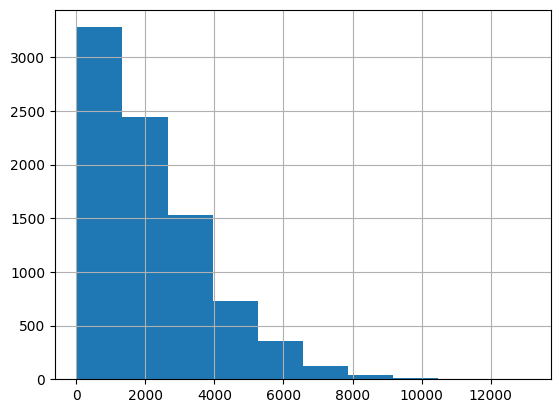

In [173]:
df['Item_Outlet_Sales'].hist()

In [174]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

- based on r2 values our model will predict the the sales of the outlet with an around 60% of varince frm the real sales values.
- based on RMSE values our model predict that the diffrence between the actual values and our prdiction would be in the range of 1000 $.
- its more easy to understand and read.
- its not over fit or under fit since the metrics of the training set and testing set are slighty close to eachother.

# Importance and Permutation Importance

In [197]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False,
                annotate=False, ha='left',va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    """Plots the top_n coefficients from a Series, with optional annotations."""
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
           ylabel='Feature Names',
           title=title)
    ax.axvline(0, color='k')

    if annotate==True:
        annotate_hbars(ax, ha=ha,va=va,size=size,xytext=xytext,
                       textcoords=textcoords)
    ## return ax in case want to continue to update/modify figure
    return ax

def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

In [212]:
from sklearn.inspection import permutation_importance
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [199]:
# define feature names and  extract coefficients
feature_names = preprocessor.get_feature_names_out()
coeffs = pd.Series(lin_reg.coef_, index= feature_names)
coeffs['intercept'] = lin_reg.intercept_
coeffs

Item_Weight                          -7.334106
Item_Visibility                     -21.683671
Item_MRP                            984.300036
Outlet_Establishment_Year            -0.947589
Outlet_Size                          -7.342686
Outlet_Location_Type                 11.238953
Item_Fat_Content_Regular             63.206794
Item_Type_Breads                    -30.023784
Item_Type_Breakfast                  47.062332
Item_Type_Canned                     25.470195
Item_Type_Dairy                    -105.945741
Item_Type_Frozen Foods               -2.419654
Item_Type_Fruits and Vegetables      43.640330
Item_Type_Hard Drinks                10.190427
Item_Type_Health and Hygiene         26.510014
Item_Type_Household                   3.214876
Item_Type_Meat                       -9.687283
Item_Type_Others                    -31.804625
Item_Type_Seafood                   317.775326
Item_Type_Snack Foods               -20.871974
Item_Type_Soft Drinks               -42.263929
Item_Type_Sta

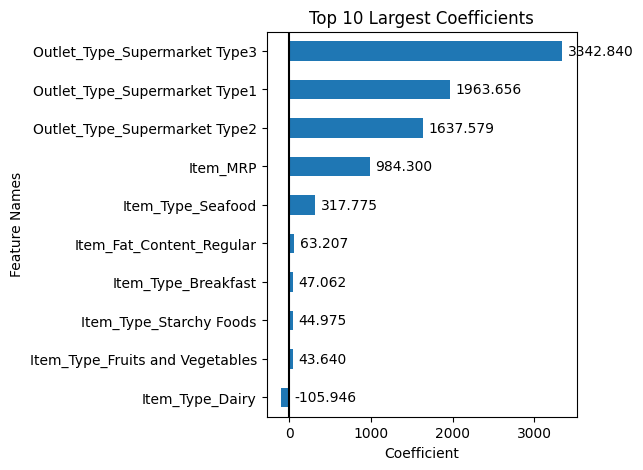

In [200]:
ax = plot_coeffs(coeffs, top_n=10)
for bar in ax.patches:
  # calculate center of bar
  bar_ax = bar.get_y() + bar.get_height() / 2
    ## get the value to annotate
  val = bar.get_width()
  if val < 0:
    val_pos = 0
  else:
    val_pos = val
   # ha and va stand for the horizontal and vertical alignment
  ax.annotate(f"{val:.3f}", (val_pos,bar_ax),
                ha='left', va='center',size=10,
                xytext=(4,0), textcoords='offset points')

In [201]:
fig = plt.figure()
fig.savefig('SavedPlot-coefficient.png', dpi = 300, facecolor='white')

<Figure size 640x480 with 0 Axes>

- Interpret the most three impactful coefficients:
  - 1. Outlet_Type_Supermarket Type3: product in this type will lead to rise the sales by 3342.84
  - 2. Outlet_Type_Supermarket Type1: product being in this type  will lead to rise the sales by 1963.65
  - 3. Outlet_Type_Supermarket Type2: the item sell in this type of supermarket will rise the outlet sales by 1637.57

In [204]:
# extract feature importances( permutation )
r = permutation_importance(best_rf, X_test_tf, y_test,n_repeats =5, random_state = 42)
r.keys()
permutation_importances = pd.Series(r['importances_mean'],index=X_test_tf.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

Item_MRP                           0.727772
Outlet_Type_Supermarket Type3      0.549795
Outlet_Type_Supermarket Type1      0.414515
Outlet_Establishment_Year          0.031013
Outlet_Type_Supermarket Type2      0.016311
Item_Visibility                    0.004055
Item_Type_Fruits and Vegetables    0.001044
Item_Weight                        0.000743
Item_Type_Household                0.000294
Outlet_Size                        0.000287
Item_Type_Canned                   0.000149
Item_Type_Seafood                  0.000103
Item_Type_Starchy Foods            0.000057
Item_Type_Others                   0.000016
Outlet_Location_Type              -0.000012
Item_Type_Soft Drinks             -0.000017
Item_Type_Breakfast               -0.000049
Item_Type_Snack Foods             -0.000058
Item_Type_Meat                    -0.000117
Item_Type_Hard Drinks             -0.000155
Item_Type_Breads                  -0.000242
Item_Type_Frozen Foods            -0.000316
Item_Type_Health and Hygiene    

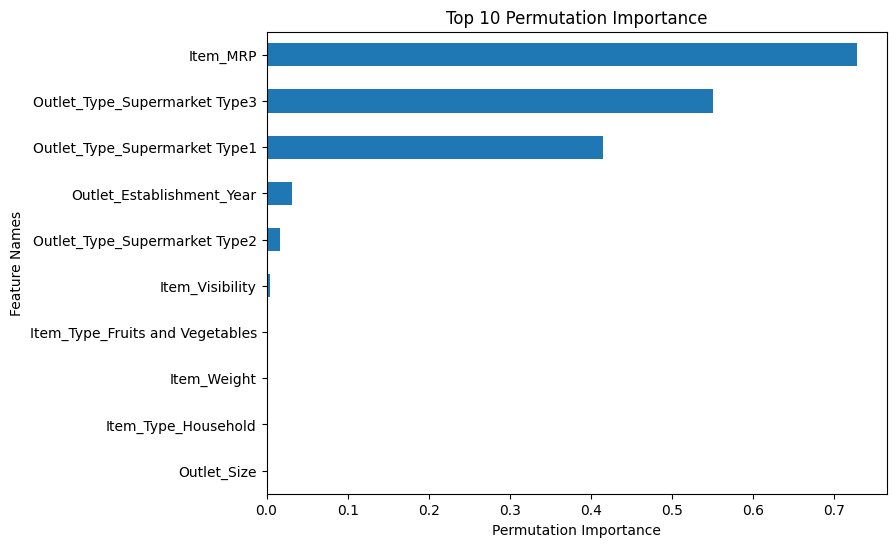

<Figure size 640x480 with 0 Axes>

In [217]:
ax = plot_importance(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance', title='Top 10 Permutation Importance');
fig = plt.figure()
fig.savefig('SavedPlot-permutationImportance.png', dpi = 300, facecolor='white')